### Testing library bk_random from www.python-course.eu/bk_random.py

The following generator (from http://www.python-course.eu/synthetical_test_data_with_python.php)
is added to the library bk_random in order to utilize the methods for efficient sampling.

In [1]:
import bk_random

def synthesiser(data, weights=None, format_function=None, repeats=True):
    # If no repeats of items in the result
    if not repeats:
        memory = set()

    def choice(data, weights):
        if weights:
            return bk_random.weighted_cartesian_choice(*zip(data, weights))
        else:
            return bk_random.cartesian_choice(*data)

    # Creates an iterable
    def synthesise():
        while True:
            res = choice(data, weights)
            if not repeats:
                sres = str(res)
                while sres in memory:
                    res = choice(data, weights)
                    sres = str(res)
                memory.add(sres)
            if format_function:
                yield format_function(res)
            else:
                yield res
    return synthesise()

In [2]:
# Variables:

dataset_path = 'student-mat.csv'

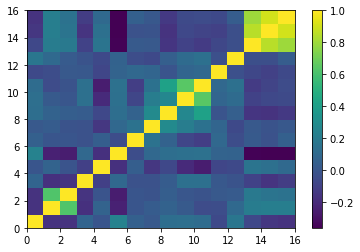

In [3]:
import pandas as pd
import matplotlib.pyplot as plt
performance_data = pd.read_csv(dataset_path, sep=';')

# Plots a correlation matrix
def corrplot(corrmat):
    plt.pcolor(corrmat)
    plt.colorbar()
    plt.show()

# Let's look at the desired correlation matrix from the original dataset
corrplot(performance_data.corr())

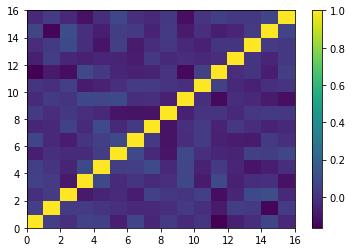

In [4]:
from numpy import int64, dtype, shape
import csv

# Creating input to the sampling algorithm
data_sets = tuple()
weights = tuple()
for col in performance_data:
    frequency_dict = performance_data[col].value_counts().to_dict()
    # unique values from original dataset as sampling input
    values = list(frequency_dict.keys())
    frequencies = frequency_dict.values()
    # frequency in range [0, 1] as weights
    weights = weights + ([frequency/sum(frequencies) for frequency in frequencies],)
    data_sets = data_sets + (values,)

# Creating the sampler from bk_random
sampler = synthesiser(data=data_sets, weights=weights, repeats=True)

# Making a list of rows as long as the original dataset
li = []
for i in range(shape(performance_data)[0]):
    li.append(next(sampler))

s_data = pd.DataFrame(li, columns=performance_data.columns)

# The correlation matrix of the synthetic data
corrplot(s_data.corr())

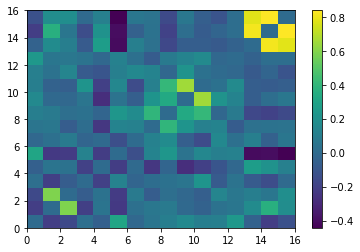

In [5]:
# Let's look at the difference between the correlation matrices

corr_original = performance_data.corr()
corr_samples = s_data.corr()

diff_mat = corr_original.subtract(corr_samples)

corrplot(diff_mat)

In the plot above we see that the correlations in the top right corner of the original orrelation matrix is still present, and thus is not present in the synthetic dataset.

Ideally the matrix should be the same colour as the diagonal from the bottom left corner to the top right corner (0.0).

We conclude that the library bk_random is not useful if correlation must be preserved. 